In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

In [2]:
summ = pd.read_csv('train_summarised.csv')
macro = pd.read_excel('exported_macro_dataframe.xlsx')

In [4]:
macro = macro.iloc[:, 1:]

In [6]:
macro.head()

,mth_code,MONTHLY.1,MONTHLY.8,MONTHLY.14,MONTHLY.18,MONTHLY.20,MONTHLY.26,MONTHLY.28,MONTHLY.39,MONTHLY.41,MONTHLY.50,MONTHLY.52,MONTHLY.80,MONTHLY.81,MONTHLY.90,MONTHLY.91
0,2018-01-31,10761.294,1.033239e+06,9.772692,2808.21485,4721.424,147.672,2.392,2.583810,33.6,207.32,0.622,0.415719,-9.924650,4.058025,64.182997
1,2018-02-28,10780.022,9.418223e+05,9.727890,2820.09682,4758.228,148.078,2.327,2.858947,33.8,208.87,0.637,1.273650,-9.938967,4.206673,64.299439
2,2018-03-31,10808.394,9.444463e+05,9.709184,2831.77412,4751.832,148.254,2.222,2.842381,33.7,209.68,0.662,1.355138,-10.136378,4.374299,64.417509
3,2018-04-30,10850.006,9.664243e+05,9.707564,2842.38123,4761.924,148.391,2.343,2.869048,33.8,210.31,0.637,1.245950,-10.582066,4.530713,64.508728
4,2018-05-31,10884.605,9.559457e+05,9.707665,2856.79584,4832.124,148.669,2.186,2.977727,33.8,210.84,0.657,0.859061,-11.225725,4.625637,64.528112


In [7]:
summ.head()

,mth_code,financial_active,promotion_flag,variable_rate_index,active_12_mths,mob,open_closed_flag,ever_delinquent_flg,nbr_mths_due,variable_rate_margin,stmt_balance,prev_balance,net_sales,net_payments,purchase_active,credit_limit_amt,credit_limit_pa,closed,charge_off,charge_off_aged,charge_off_bk,principal_amt,principal_amt_chrg_off,total_writeoff_amt,fee_chg_off_reversal_amt,net_finance_charge,non_principal_amount_gross,non_principal_amount_net,non_principal_amount_stmt,aged_writeoff_amt,bankruptcy_writeoff_amt,fc_reversals,fraud_writeoff_amt,other_writeoff_amt,promo_bal_amt,recovery_amt,writeoff_type_bko,writeoff_type_fraud_kiting,writeoff_type_fraud_synthetic,writeoff_type_deceased,writeoff_type_other,writeoff_type_settlement,writeoff_type_fraud_other,writeoff_type_repo,writeoff_type_null,due_account_2,due_account_3,due_account_4,due_account_5,due_account_6,due_account_7,due_account_8,due_balance_2,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,net_payment_behaviour_tripd_C,net_payment_behaviour_tripd_D,net_payment_behaviour_tripd_I,net_payment_behaviour_tripd_P,net_payment_behaviour_tripd_R,net_payment_behaviour_tripd_T,account_status_code_A,account_status_code_Clchange,account_status_code_I 0-6,account_status_code_I 13-24,account_status_code_I 25+,account_status_code_I 7-12,account_status_code_MonthEnd,account_status_code_Recovery,account_status_code_W,bank_fico_buckets_20_561-580,bank_fico_buckets_20_581-600,bank_fico_buckets_20_601-620,bank_fico_buckets_20_621-640,bank_fico_buckets_20_641-660,bank_fico_buckets_20_661-680,bank_fico_buckets_20_681-700,bank_fico_buckets_20_701-720,bank_fico_buckets_20_721-740,bank_fico_buckets_20_741-760,bank_fico_buckets_20_761+,bank_fico_buckets_20_<= 560,bank_fico_buckets_20_Exception,bank_fico_buckets_20_Missing,industry_A,industry_B,industry_C
0,2018-01-01,13354.0,6989,5642,17658.0,1195759,19706.0,2218.0,2213.0,115236.15,15590401.54,16101387.13,2098223.87,2516590.25,4043.0,89441398.0,23236485.0,0,0,0,0,13904412.51,11614.44,269.69,0.00,189977.26,1506694.85,1636746.80,1504279.16,0.00,0.00,0.00,2525.26,0.00,7182281.48,209.00,0,0,0,0,0,0,4,0,19858,683.0,125.0,77.0,57.0,56.0,60.0,0.0,1031636.44,176053.77,186044.49,141925.06,115160.23,121627.48,0.0,8.0,920.0,6501.0,7118.0,1742.0,3569.0,13363.0,0.0,2838.0,1399.0,344.0,1904.0,0.0,3.0,7.0,186.0,272.0,543.0,970.0,1530.0,1883.0,1789.0,1877.0,1752.0,1671.0,7098.0,198.0,19.0,70.0,4510.0,11593.0,3755.0
1,2018-02-01,26454.0,13938,11327,35045.0,2397630,39301.0,4483.0,4677.0,229380.99,30338275.46,31121111.21,4076402.67,5086573.52,7834.0,177549797.0,45299853.0,0,78,70,10,27793364.60,106092.76,159620.24,61822.16,361028.67,2871948.87,3006563.74,2982399.02,120791.36,8132.46,28322.67,14872.68,10557.00,14497933.78,2991.99,14,0,0,1,0,2,10,0,39628,1312.0,213.0,175.0,131.0,108.0,93.0,0.0,2216066.10,431785.80,337333.86,285258.40,227811.14,250905.78,0.0,6.0,1898.0,13404.0,14190.0,3225.0,6983.0,26317.0,0.0,5812.0,3018.0,772.0,3778.0,4.0,2.0,3.0,342.0,585.0,1097.0,1903.0,3017.0,3655.0,3920.0,3870.0,3633.0,3115.0,13964.0,457.0,34.0,114.0,9177.0,23109.0,7420.0
2,2018-03-01,39247.0,20534,16931,52381.0,3555091,58825.0,6688.0,6528.0,338806.08,45666610.36,46899635.05,6224868.03,7508653.20,11619.0,266065182.0,68699253.0,0,162,137,21,40909374.10,262438.54,353689.87,99535.58,557727.04,4430380.48,4408540.88,4527729.71,303152.85,44378.97,78317.64,4079.33,23098.99,21598817.57,5751.83,25,0,0,8,0,6,21,0,59300,1909.0,357.0,234.0,178.0,168.0,174.0,0.0,3168372.74,623633.79,583897.88,359504.70,331956.97,309386.85,0.0,26.0,2764.0,20327.0,21216.0,4661.0,10468.0,39044.0,0.0,8986.0,4570.0,1181.0,5648.0,4.0,5.0,24.0,537.0,866.0,1603.0,2901.0,4570.0,5486.0,5804.0,5711.0,5447.0,4597.0,21012.0,710.0,42.0,176.0,13376.0,35081.0,11005.0
3,2018-04-01,51750.0,27279,22594,69167.0,4764651,78262.0,9051.0,8415.0,457466.35,60442784.94,61562082.69,7967601.96,9872436.96,15551.0,355465298.0,90708996.0,0,206,170,34,55040259.79,316564.87,479925.01,134692.61,731933.64,

In [11]:
summ['mth_code'] = pd.to_datetime(summ['mth_code'])

In [15]:
summ['mergeon'] = summ['mth_code'].dt.strftime("%m%Y")
macro['mergeon'] = macro['mth_code'].dt.strftime("%m%Y")

In [16]:
merged = summ.merge(macro, on='mergeon', how='left')

In [17]:
merged.shape, summ.shape, macro.shape

((24, 108), (24, 92), (48, 17))

In [19]:
merged.head()

,mth_code_x,financial_active,promotion_flag,variable_rate_index,active_12_mths,mob,open_closed_flag,ever_delinquent_flg,nbr_mths_due,variable_rate_margin,stmt_balance,prev_balance,net_sales,net_payments,purchase_active,credit_limit_amt,credit_limit_pa,closed,charge_off,charge_off_aged,charge_off_bk,principal_amt,principal_amt_chrg_off,total_writeoff_amt,fee_chg_off_reversal_amt,net_finance_charge,non_principal_amount_gross,non_principal_amount_net,non_principal_amount_stmt,aged_writeoff_amt,bankruptcy_writeoff_amt,fc_reversals,fraud_writeoff_amt,other_writeoff_amt,promo_bal_amt,recovery_amt,writeoff_type_bko,writeoff_type_fraud_kiting,writeoff_type_fraud_synthetic,writeoff_type_deceased,writeoff_type_other,writeoff_type_settlement,writeoff_type_fraud_other,writeoff_type_repo,writeoff_type_null,due_account_2,due_account_3,due_account_4,due_account_5,due_account_6,due_account_7,due_account_8,due_balance_2,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,net_payment_behaviour_tripd_C,net_payment_behaviour_tripd_D,net_payment_behaviour_tripd_I,net_payment_behaviour_tripd_P,net_payment_behaviour_tripd_R,net_payment_behaviour_tripd_T,account_status_code_A,account_status_code_Clchange,account_status_code_I 0-6,account_status_code_I 13-24,account_status_code_I 25+,account_status_code_I 7-12,account_status_code_MonthEnd,account_status_code_Recovery,account_status_code_W,bank_fico_buckets_20_561-580,bank_fico_buckets_20_581-600,bank_fico_buckets_20_601-620,bank_fico_buckets_20_621-640,bank_fico_buckets_20_641-660,bank_fico_buckets_20_661-680,bank_fico_buckets_20_681-700,bank_fico_buckets_20_701-720,bank_fico_buckets_20_721-740,bank_fico_buckets_20_741-760,bank_fico_buckets_20_761+,bank_fico_buckets_20_<= 560,bank_fico_buckets_20_Exception,bank_fico_buckets_20_Missing,industry_A,industry_B,industry_C,mergeon,mth_code_y,MONTHLY.1,MONTHLY.8,MONTHLY.14,MONTHLY.18,MONTHLY.20,MONTHLY.26,MONTHLY.28,MONTHLY.39,MONTHLY.41,MONTHLY.50,MONTHLY.52,MONTHLY.80,MONTHLY.81,MONTHLY.90,MONTHLY.91
0,2018-01-01,13354.0,6989,5642,17658.0,1195759,19706.0,2218.0,2213.0,115236.15,15590401.54,16101387.13,2098223.87,2516590.25,4043.0,89441398.0,23236485.0,0,0,0,0,13904412.51,11614.44,269.69,0.00,189977.26,1506694.85,1636746.80,1504279.16,0.00,0.00,0.00,2525.26,0.00,7182281.48,209.00,0,0,0,0,0,0,4,0,19858,683.0,125.0,77.0,57.0,56.0,60.0,0.0,1031636.44,176053.77,186044.49,141925.06,115160.23,121627.48,0.0,8.0,920.0,6501.0,7118.0,1742.0,3569.0,13363.0,0.0,2838.0,1399.0,344.0,1904.0,0.0,3.0,7.0,186.0,272.0,543.0,970.0,1530.0,1883.0,1789.0,1877.0,1752.0,1671.0,7098.0,198.0,19.0,70.0,4510.0,11593.0,3755.0,012018,2018-01-31,10761.294,1.033239e+06,9.772692,2808.21485,4721.424,147.672,2.392,2.583810,33.6,207.32,0.622,0.415719,-9.924650,4.058025,64.182997
1,2018-02-01,26454.0,13938,11327,35045.0,2397630,39301.0,4483.0,4677.0,229380.99,30338275.46,31121111.21,4076402.67,5086573.52,7834.0,177549797.0,45299853.0,0,78,70,10,27793364.60,106092.76,159620.24,61822.16,361028.67,2871948.87,3006563.74,2982399.02,120791.36,8132.46,28322.67,14872.68,10557.00,14497933.78,2991.99,14,0,0,1,0,2,10,0,39628,1312.0,213.0,175.0,131.0,108.0,93.0,0.0,2216066.10,431785.80,337333.86,285258.40,227811.14,250905.78,0.0,6.0,1898.0,13404.0,14190.0,3225.0,6983.0,26317.0,0.0,5812.0,3018.0,772.0,3778.0,4.0,2.0,3.0,342.0,585.0,1097.0,1903.0,3017.0,3655.0,3920.0,3870.0,3633.0,3115.0,13964.0,457.0,34.0,114.0,9177.0,23109.0,7420.0,022018,2018-02-28,10780.022,9.418223e+05,9.727890,2820.09682,4758.228,148.078,2.327,2.858947,33.8,208.87,0.637,1.273650,-9.938967,4.206673,64.299439
2,2018-03-01,39247.0,20534,16931,52381.0,3555091,58825.0,6688.0,6528.0,338806.08,45666610.36,46899635.05,6224868.03,7508653.20,11619.0,266065182.0,68699253.0,0,162,137,21,40909374.10,262438.54,353689.87,99535.58,557727.04,4430380.48,4408540.88,4527729.71,303152.85,44378.97,78317.64,4079.33,23098.99,21598817.57,5751.83,25,0,0,8,0,6,21,0,59300,1909.0,357.0,234.0,178.0,168.0,174.0,0.0,3168372.74,623633.7

In [20]:
merged.drop('mth_code_y', axis=1, inplace = True)

In [21]:
merged.shape, summ.shape, macro.shape

((24, 107), (24, 92), (48, 17))

In [22]:
merged.to_csv('merged.csv', index=False)

In [29]:
merged['mth_code_x'] = pd.to_datetime(merged['mth_code_x'])

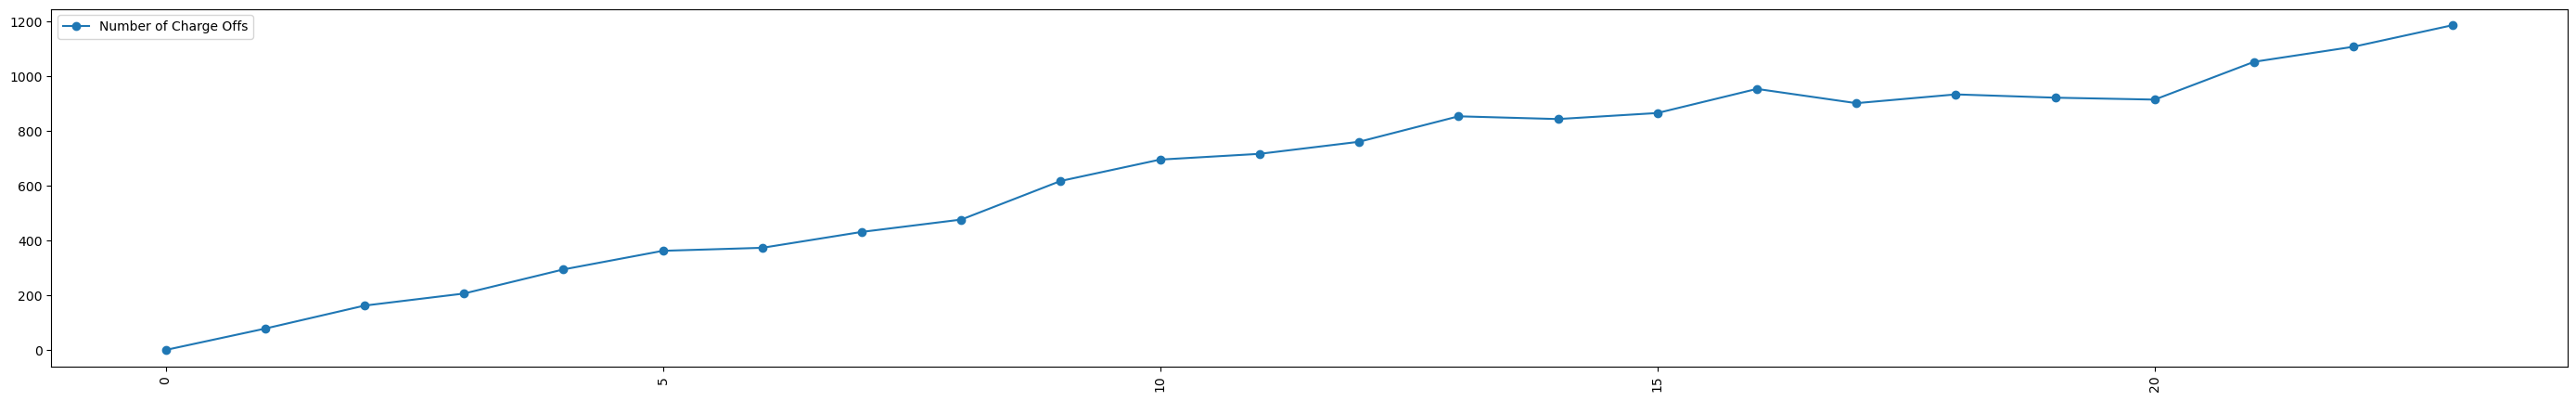

In [38]:
import matplotlib.pyplot as plt
# Ploting the curve 
plt.figure(figsize=(35,5))
#plt.grid()
plt.plot(merged['charge_off'], marker='o', label='Number of Charge Offs')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [39]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 580.2/580.2 kB 4.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [40]:
from pmdarima import model_selection
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

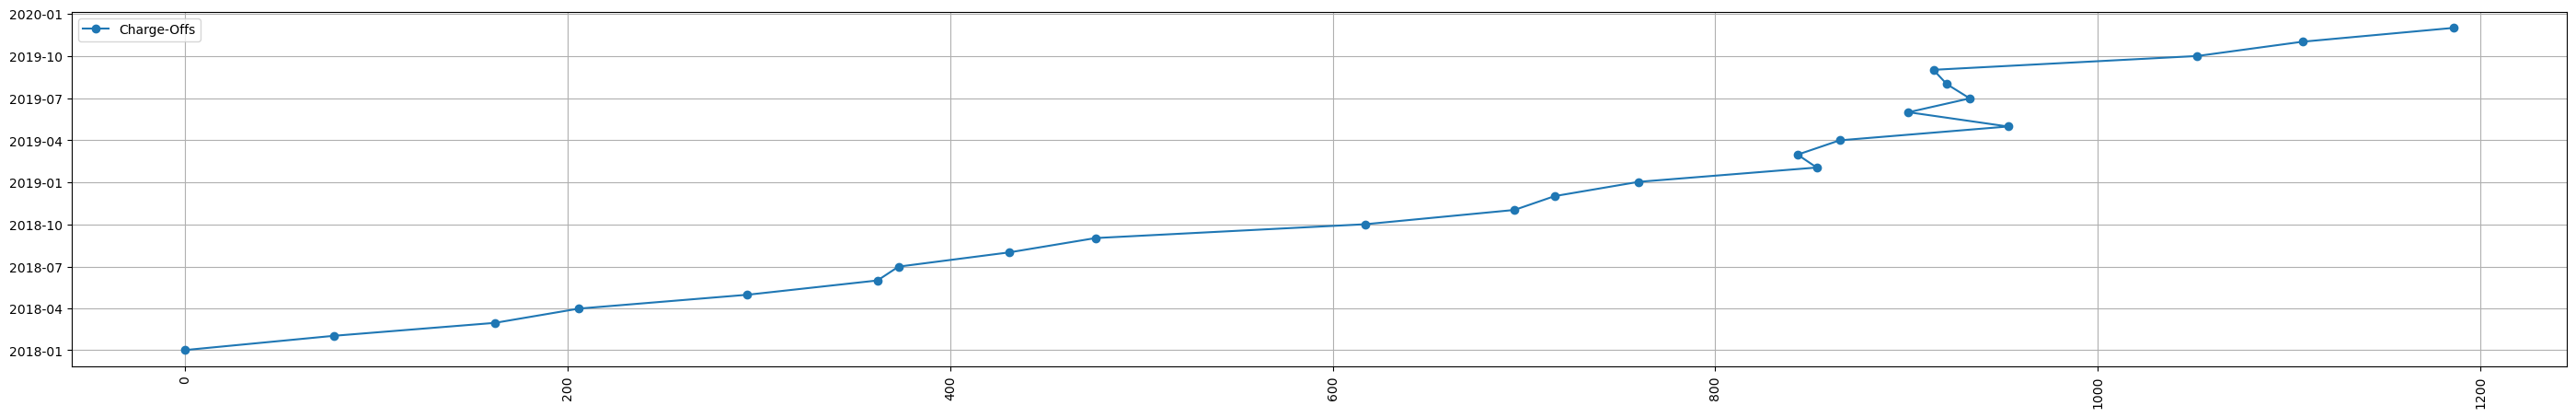

In [41]:
plt.figure(figsize=(35,5))
plt.grid()
plt.plot(merged['charge_off'], merged['mth_code_x'], marker='o', label='Charge-Offs')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [42]:
ts_decomposition = seasonal_decompose(x=merged['charge_off'], model='additive', period=6)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid

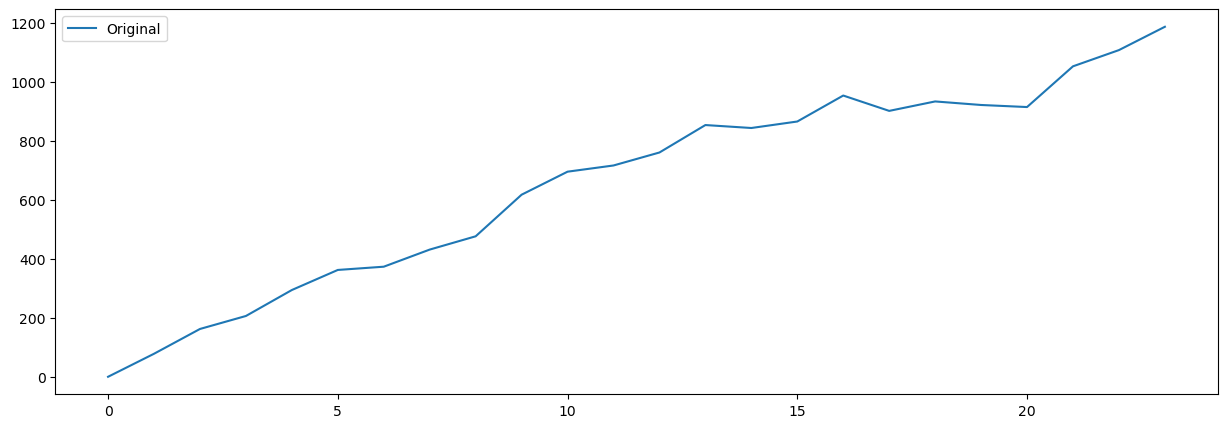

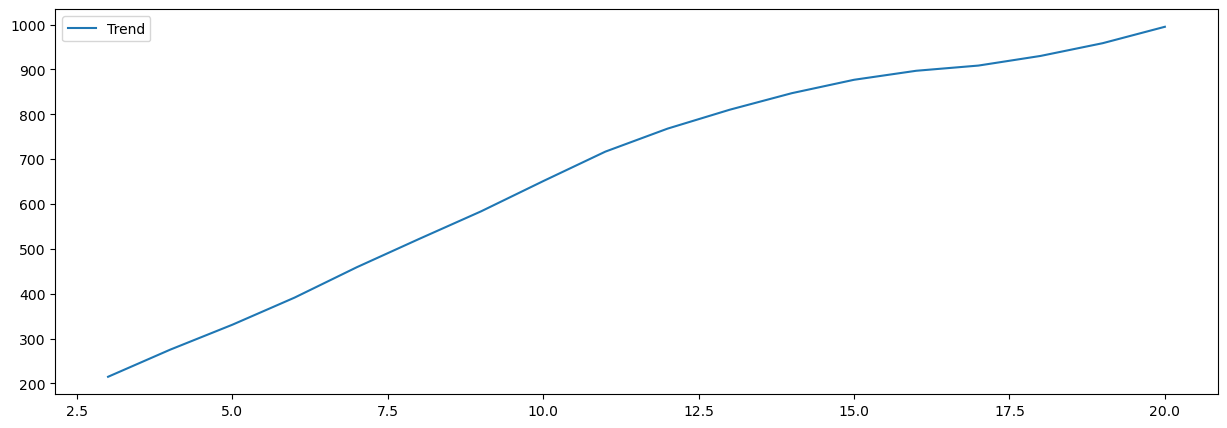

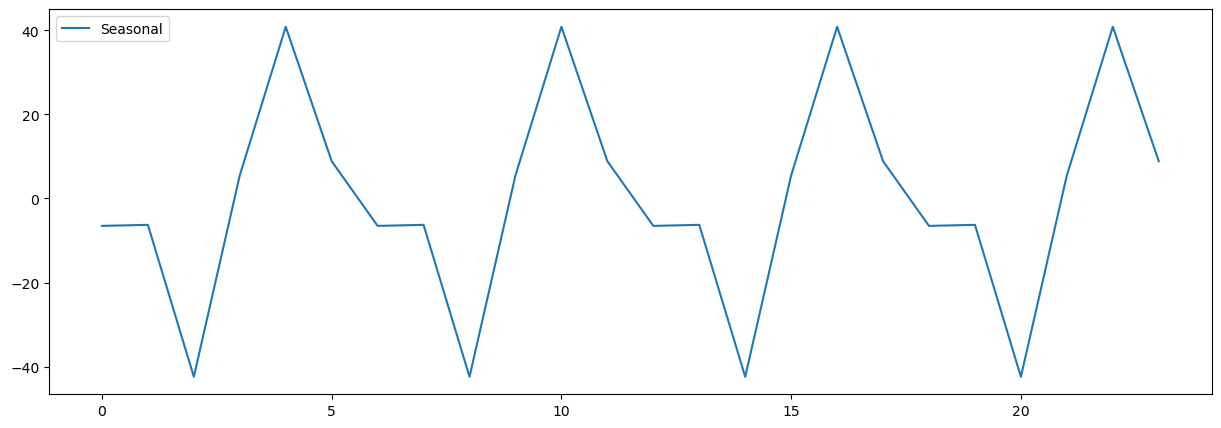

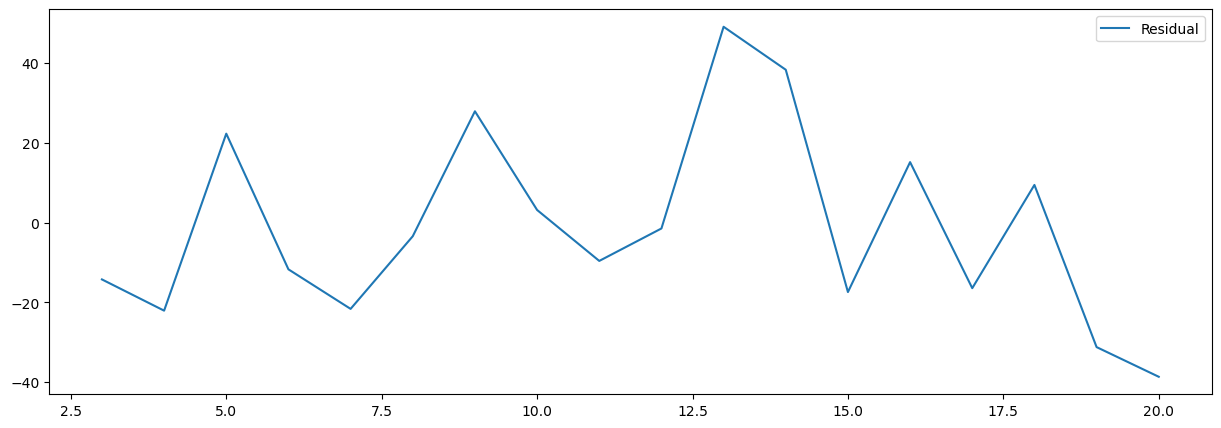

In [43]:
plt.figure(figsize=(15,5))
plt.plot(merged['charge_off'], label='Original')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(trend_estimate, label='Trend')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(seasonal_estimate, label='Seasonal')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(residual_estimate, label='Residual')
plt.legend()

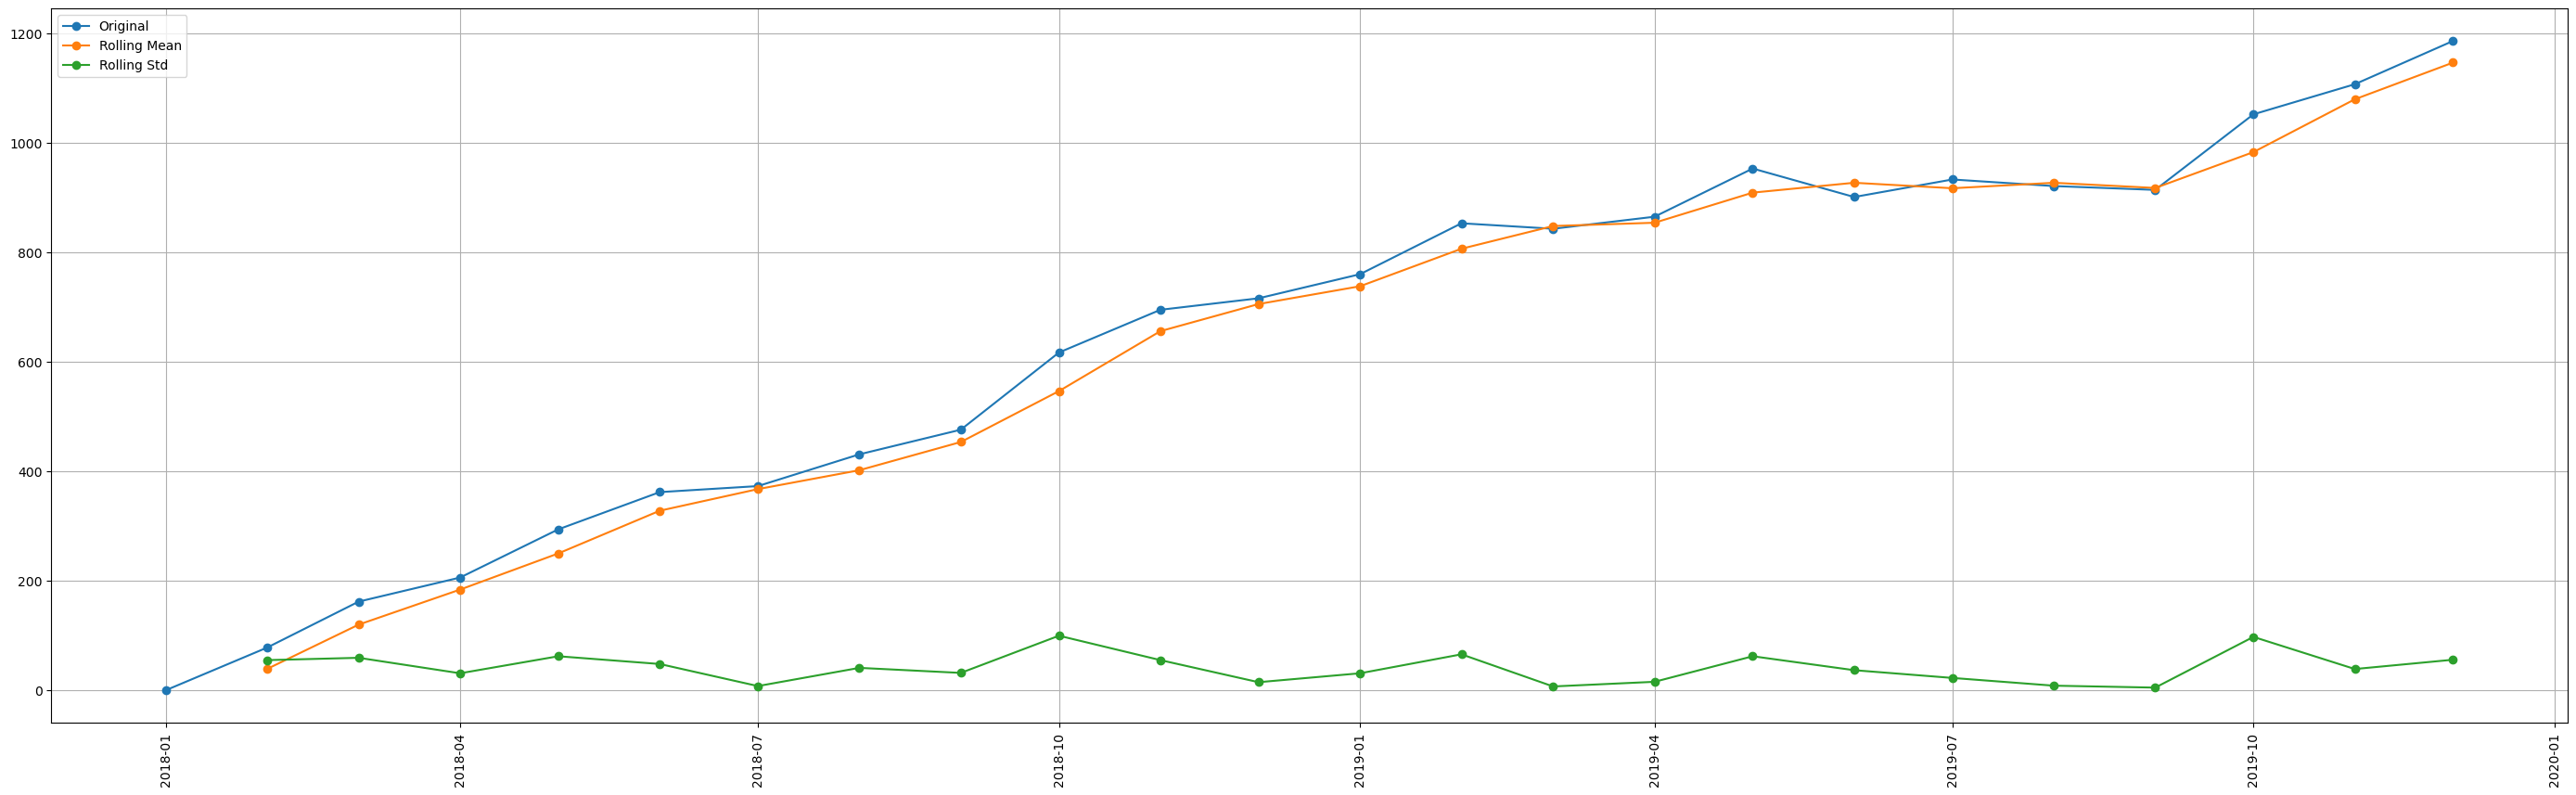

In [58]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(merged['mth_code_x'], merged['charge_off'], marker='o', label='Original')
plt.plot(merged['mth_code_x'], merged['charge_off'].rolling(window=2).mean(), marker='o', label='Rolling Mean')
plt.plot(merged['mth_code_x'], merged['charge_off'].rolling(window=2).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [72]:
from statsmodels.tsa.stattools import adfuller
stationary = []
def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        stationary.append(series.name)
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [73]:
# ADF Test on each column
for name, column in merged.drop(columns='mth_code_x').iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "financial_active" 
    -----------------------------------------------
ADF Statistic: -5.473950
p-value: 0.000002
Critical Values:
	1%: -3.770
	5%: -3.005
	10%: -2.643
Stationary


    Augmented Dickey-Fuller Test on "promotion_flag" 
    -----------------------------------------------
ADF Statistic: -5.332490
p-value: 0.000005
Critical Values:
	1%: -3.770
	5%: -3.005
	10%: -2.643
Stationary


    Augmented Dickey-Fuller Test on "variable_rate_index" 
    -----------------------------------------------
ADF Statistic: -1.417563
p-value: 0.573828
Critical Values:
	1%: -3.964
	5%: -3.085
	10%: -2.682
Non-stationary


    Augmented Dickey-Fuller Test on "active_12_mths" 
    -----------------------------------------------
ADF Statistic: -24.344210
p-value: 0.000000
Critical Values:
	1%: -3.753
	5%: -2.998
	10%: -2.639
Stationary


    Augmented Dickey-Fuller Test on "mob" 
    -----------------------------------------------
ADF Statistic: -3.253313
p-va

/Users/smitmalik/miniforge3/envs/DataViz/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/smitmalik/miniforge3/envs/DataViz/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/smitmalik/miniforge3/envs/DataViz/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [74]:
stationary

['financial_active',
 'promotion_flag',
 'active_12_mths',
 'mob',
 'net_payments',
 'credit_limit_amt',
 'closed',
 'non_principal_amount_net',
 'non_principal_amount_stmt',
 'other_writeoff_amt',
 'due_account_3',
 'due_account_8',
 'due_balance_2',
 'net_payment_behaviour_tripd_R',
 'net_payment_behaviour_tripd_T',
 'account_status_code_A',
 'account_status_code_Clchange',
 'account_status_code_I 0-6',
 'account_status_code_I 13-24',
 'bank_fico_buckets_20_641-660',
 'bank_fico_buckets_20_681-700',
 'bank_fico_buckets_20_701-720',
 'industry_B',
 'industry_C',
 'MONTHLY.8',
 'MONTHLY.39',
 'MONTHLY.80']

In [85]:
train = merged[['financial_active',
 'promotion_flag',
 'active_12_mths',
 'mob',
 'net_payments',
 'credit_limit_amt',
 'closed',
 'non_principal_amount_net',
 'non_principal_amount_stmt',
 'other_writeoff_amt',
 'due_account_3',
 'due_account_8',
 'due_balance_2',
 'net_payment_behaviour_tripd_R',
 'net_payment_behaviour_tripd_T',
 'account_status_code_A',
 'account_status_code_Clchange',
 'account_status_code_I 0-6',
 'account_status_code_I 13-24',
 'bank_fico_buckets_20_641-660',
 'bank_fico_buckets_20_681-700',
 'bank_fico_buckets_20_701-720',
 'industry_B',
 'industry_C',
 'MONTHLY.8',
 'MONTHLY.39',
 'MONTHLY.80',
               'charge_off']]

training = train[:-3]
test = train[-3:]

In [78]:
import pmdarima as pm

In [86]:
model = pm.auto_arima(training['charge_off'], 
                        m=2, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,1,1)[2]             : AIC=inf, Time=0.04 sec
 ARIMA(0,2,0)(0,1,0)[2]             : AIC=205.304, Time=0.00 sec
 ARIMA(1,2,0)(1,1,0)[2]             : AIC=199.129, Time=0.03 sec
 ARIMA(0,2,1)(0,1,1)[2]             : AIC=inf, Time=0.05 sec
 ARIMA(1,2,0)(0,1,0)[2]             : AIC=205.135, Time=0.01 sec
 ARIMA(1,2,0)(2,1,0)[2]             : AIC=195.166, Time=0.05 sec
 ARIMA(1,2,0)(2,1,1)[2]             : AIC=inf, Time=0.12 sec
 ARIMA(1,2,0)(1,1,1)[2]             : AIC=inf, Time=0.04 sec
 ARIMA(0,2,0)(2,1,0)[2]             : AIC=200.998, Time=0.02 sec
 ARIMA(1,2,1)(2,1,0)[2]             : AIC=193.499, Time=0.05 sec
 ARIMA(1,2,1)(1,1,0)[2]             : AIC=inf, Time=0.03 sec
 ARIMA(1,2,1)(2,1,1)[2]             : AIC=inf, Time=0.16 sec
 ARIMA(1,2,1)(1,1,1)[2]             : AIC=inf, Time=0.10 sec
 ARIMA(0,2,1)(2,1,0)[2]             : AIC=inf, Time=0.03 sec
 ARIMA(1,2,1)(2,1,0)[2] intercept   : AIC=inf, Time=0.13 sec

Best model:  ARIM

In [97]:
arima = pm.auto_arima(training['charge_off'],X=training, d=1,error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=500,m=4,stationary=False,test='adf')

# Print out summary information on the fit
print(arima.summary())
print(arima.params)

predtrain=arima.predict(n_periods=21, X=training, alpha=0.05)
predtrain

Performing stepwise search to minimize aic


/Users/smitmalik/miniforge3/envs/DataViz/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/smitmalik/miniforge3/envs/DataViz/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=-330.552, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=-342.572, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=-338.702, Time=0.33 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=-338.205, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=-344.572, Time=0.12 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=-340.536, Time=0.33 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=-340.549, Time=0.40 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=-338.552, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=-340.735, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=-340.230, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=-356.959, Time=0.17 sec


/Users/smitmalik/miniforge3/envs/DataViz/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/smitmalik/miniforge3/envs/DataViz/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/smitmalik/miniforge3/envs/DataViz/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,1)(1,0,0)[4] intercept   : AIC=-354.439, Time=0.24 sec
 ARIMA(1,1,1)(0,0,1)[4] intercept   : AIC=-356.105, Time=0.20 sec


/Users/smitmalik/miniforge3/envs/DataViz/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,1)(1,0,1)[4] intercept   : AIC=-354.157, Time=0.28 sec


/Users/smitmalik/miniforge3/envs/DataViz/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/smitmalik/miniforge3/envs/DataViz/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[4] intercept   : AIC=-336.572, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=-335.723, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=-337.712, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[4] intercept   : AIC=-338.550, Time=0.33 sec


/Users/smitmalik/miniforge3/envs/DataViz/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/smitmalik/miniforge3/envs/DataViz/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=-334.572, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=-339.619, Time=0.27 sec

Best model:  ARIMA(1,1,1)(0,0,0)[4] intercept
Total fit time: 5.399 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 210.480
Date:                Sat, 25 Mar 2023   AIC                           -356.959
Time:                        21:39:47   BIC                           -325.096
Sample:                             0   HQIC                          -350.739
                                 - 21                                         
Covariance Type:                  opg                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

21   -1.106432e-08
22    7.800000e+01
23    1.620000e+02
24    2.060000e+02
25    2.940000e+02
26    3.620000e+02
27    3.730000e+02
28    4.310000e+02
29    4.760000e+02
30    6.170000e+02
31    6.950000e+02
32    7.160000e+02
33    7.600000e+02
34    8.530000e+02
35    8.430000e+02
36    8.650000e+02
37    9.530000e+02
38    9.010000e+02
39    9.330000e+02
40    9.210000e+02
41    9.140000e+02
dtype: float64

In [100]:
mape=mean_absolute_percentage_error(training['charge_off'], predtrain)
print("Mean Absolute Percentage Error", mape)
print("="*50)
mse=mean_squared_error(training['charge_off'], predtrain)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))
print("="*50)

Mean Absolute Percentage Error 2372821.3333333335
Mean Squared Error 3.9516293557424317e-16
RMSE 1.9878705580953787e-08
AIC values -356.95902817651586


In [103]:
predtest=arima.predict(n_periods=3, X=test, alpha=0.02)
predtest

21     964.154673
22    1096.760385
23    1198.446075
dtype: float64

In [104]:
mape=mean_absolute_percentage_error(test['charge_off'], predtest)
print("Mean Absolute Percentage Error", mape)
print("="*50)
mse=mean_squared_error(test['charge_off'], predtest)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))
print("="*50)

Mean Absolute Percentage Error 0.034415733802328825
Mean Squared Error 2658.8520001548072
RMSE 51.56405725071299
AIC values -356.95902817651586


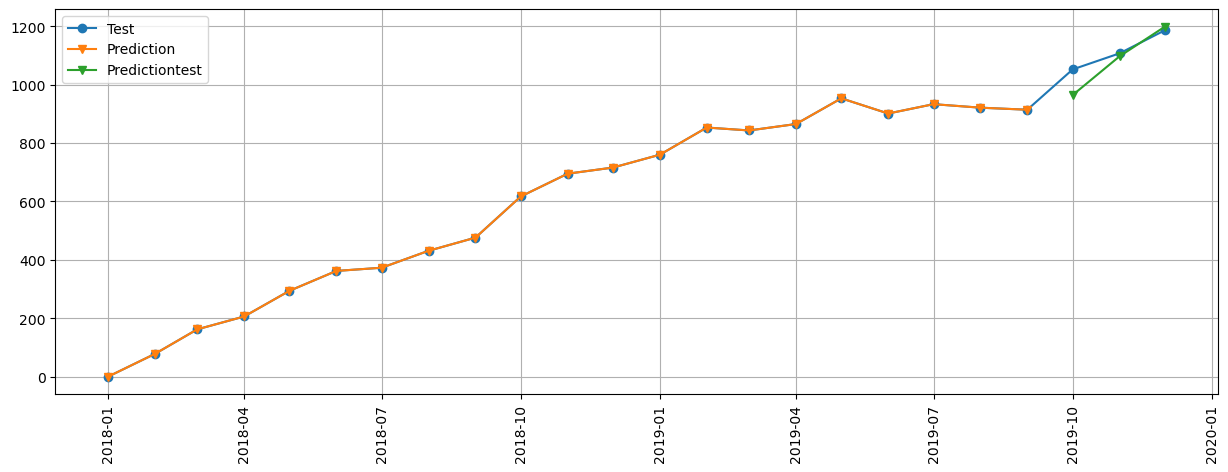

In [107]:
plt.figure(figsize=(15,5))
plt.grid()
#plt.plot(data['Period'][:-10], train['GDP_GROWTH'], marker='o', label='Train')
plt.plot(merged['mth_code_x'],train['charge_off'], marker='o', label='Test')
plt.plot(merged['mth_code_x'][:-3],predtrain, marker='v', label='Prediction')
plt.plot(merged['mth_code_x'][-3:],predtest, marker='v', label='Predictiontest')
plt.legend()
plt.xticks(rotation=90)
plt.show()